# Comparison of precipitation from evaporation versus scaling from desalination

## Evaporation


--> ERROR: The Zn element is not accepted by the pitzer database

--> ERROR: The Ni element is not accepted by the pitzer database

--> ERROR: The Cu element is not accepted by the pitzer database

--> ERROR: The Cd element is not accepted by the pitzer database

--> ERROR: The Co element is not accepted by the pitzer database

--> ERROR: The Pb element is not accepted by the pitzer database




Estimated completion in 2.20E1 seconds by 2022-01-04 23:59:04.289438 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


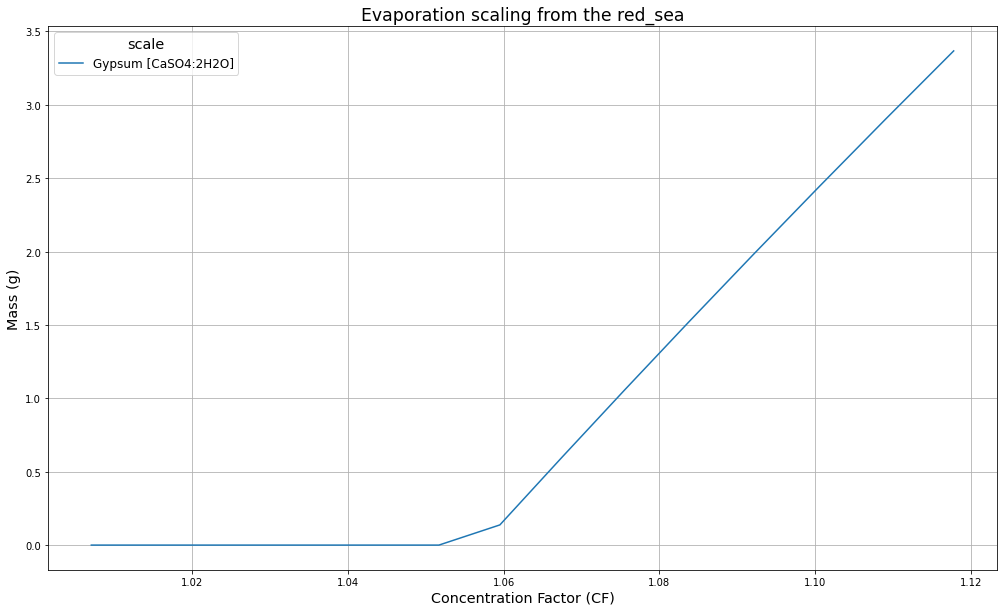

,Gypsum (g)
Concentration Factor (CF),
1.00707,0.000000
1.01424,0.000000
1.02152,0.000000
1.02890,0.000000
1.03639,0.000000
1.04399,0.000000
1.05170,0.000000
1.05953,0.137505
1.06747,0.596880


In [22]:
# run the ROSS model
%run ../../../rosspy/core.py
ross = ROSSPkg(verbose = False)
# import rosspy
# ross = rosspy.ROSSPkg(verbose = False)

# initial parameters
database_selection = 'pitzer'
water_selection = 'red_sea'
simulation_type = 'evaporation'
simulation_time = 200

# create the input file
ross.define_general(database_selection, simulation_type = simulation_type)
ross.transport(simulation_time, )
ross.reaction()
ross.solutions(water_selection)
ross.equilibrium_phases()
ross.selected_output()
ross.export()

# execute and process the input file
raw_data = ross.execute()
evaporation_data = ross.process_selected_output()
display(evaporation_data)

## Desalination


--> ERROR: The Zn element is not accepted by the pitzer database

--> ERROR: The Ni element is not accepted by the pitzer database

--> ERROR: The Cu element is not accepted by the pitzer database

--> ERROR: The Cd element is not accepted by the pitzer database

--> ERROR: The Co element is not accepted by the pitzer database

--> ERROR: The Pb element is not accepted by the pitzer database




Estimated completion in 38.0 seconds by 2022-01-05 00:07:30.004231 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


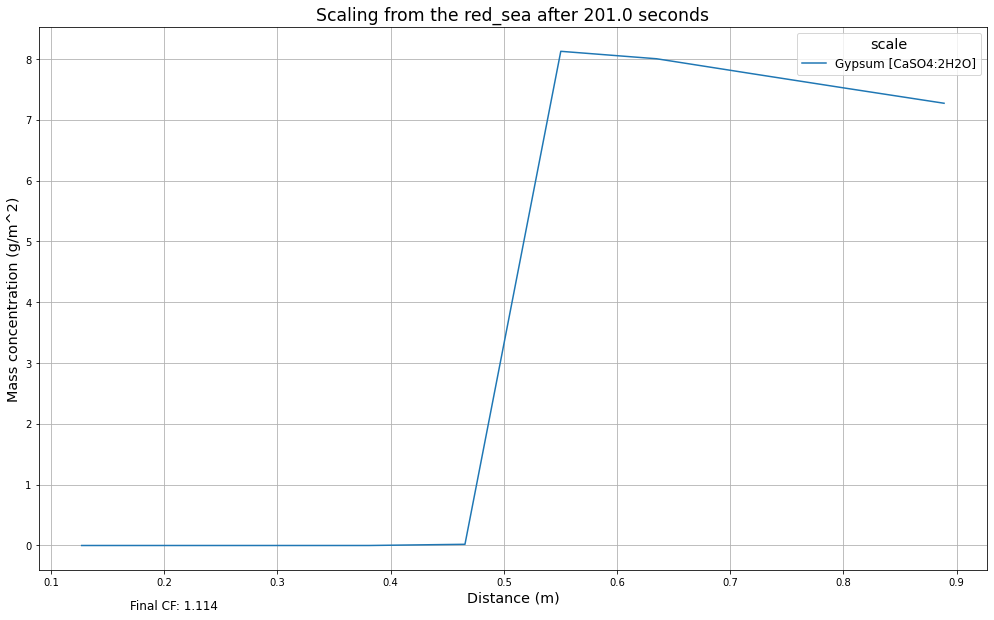

,Gypsum (g/m^2)
Distance (m),
1.27E-1,0.00E0
2.12E-1,0.00E0
2.96E-1,0.00E0
3.81E-1,0.00E0
4.66E-1,1.96E-2
5.50E-1,8.13E0
6.35E-1,8.00E0
7.20E-1,7.76E0
8.04E-1,7.51E0


In [28]:
# run the ROSS model
%run ../../../rosspy/core.py
ross = ROSSPkg(verbose = False)

# initial parameters
database_selection = 'pitzer'
simulation_title = 'test'
water_selection = 'red_sea'
simulation_perspective = 'all_distance'
simulation_type = 'transport'
simulation_time = 200

# create the input file
ross.define_general(database_selection, simulation_type = simulation_type)
ross.transport(simulation_time, simulation_perspective, )
ross.reaction()
ross.solutions(water_selection)
ross.equilibrium_phases()
ross.selected_output()
ross.export()

# execute and process the input file
raw_data = ross.execute()
desalination_data = ross.process_selected_output()
display(desalination_data)

# Comparing the scaling predictions

In [27]:
import pandas
import re

# define the parameters of the system
active_sqr_meters_per_cell = 37/12
pore_volumes = 51/12

# convert the desalination data to grams
refined_desalination_data = pandas.DataFrame()
total_scale = 0
for column in desalination_data:
    for index, row in desalination_data.iterrows():
        refined_desalination_data.at[index, column] = float(row[column]) * active_sqr_meters_per_cell/pore_volumes
        total_scale += refined_desalination_data.at[index, column]
refined_desalination_data.rename(columns = {column: re.sub('(g/m\^2)', 'g',column)}, inplace = True)
refined_desalination_data.index.name = 'Distance (m)'

# sum the evaporation scaling
total_evaporation_scaling = 0
for column in evaporation_data:
    for index, row in evaporation_data.iterrows():
        total_evaporation_scaling += evaporation_data.at[index, column]
        
# contrast the desalination and evaporation data
print('refined_desalination_data\n', total_scale, 'total g scale')
display(refined_desalination_data)
print('\n\nevaporation_data\n', total_evaporation_scaling, 'total g scale')
display(evaporation_data)

refined_desalination_data
 28.06892549019608 total g scale


,Gypsum (g)
Distance (m),
1.27E-1,0.000000
2.12E-1,0.000000
2.96E-1,0.000000
3.81E-1,0.000000
4.66E-1,0.014220
5.50E-1,5.898235
6.35E-1,5.803922
7.20E-1,5.629804
8.04E-1,5.448431




evaporation_data
 13.99875975672707 total g scale


,Gypsum (g)
Concentration Factor (CF),
1.00707,0.000000
1.01424,0.000000
1.02152,0.000000
1.02890,0.000000
1.03639,0.000000
1.04399,0.000000
1.05170,0.000000
1.05953,0.137505
1.06747,0.596880
